<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer analysis
* Iterator

In [2]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 
import os
import re 

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

from functools import reduce 
from collections import defaultdict


# Customer Analysis

In [3]:
os.listdir()

['.config',
 'KPMG_VI_New_raw_data_update_final.csv',
 '1_orders_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_order_payments_dataset.csv',
 'online_retail_II.xlsx',
 'ecommerce-data.csv',
 'test.csv',
 '1_customers_dataset.csv',
 'scanner_data.csv',
 'mall_customers.csv',
 'sample_data']

In [4]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.columns = [re.sub(' ', '_', re.sub(r' \(.+\)$', '', a)).lower() for a in df.columns]
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


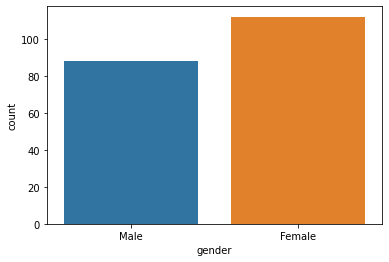

In [8]:
sns.countplot(data = df, x = 'gender')

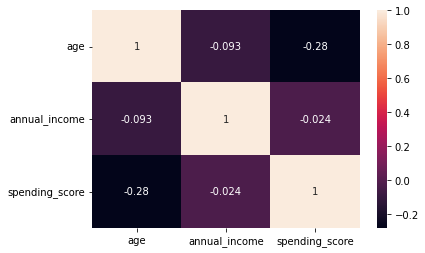

In [9]:
sns.heatmap(df[df.gender == 'Male'].drop(['customerid'], axis = 1).corr(), annot = True)

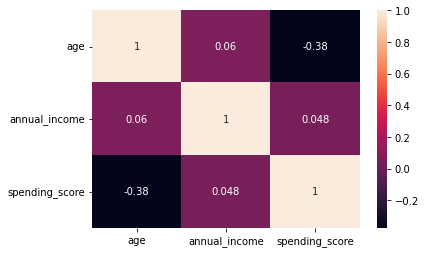

In [10]:
sns.heatmap(df[df.gender == 'Female'].drop(['customerid'], axis = 1).corr(), annot = True)

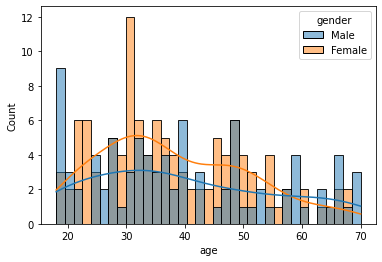

In [11]:
sns.histplot(df, x = 'age', hue = 'gender',bins = 35, kde = True)

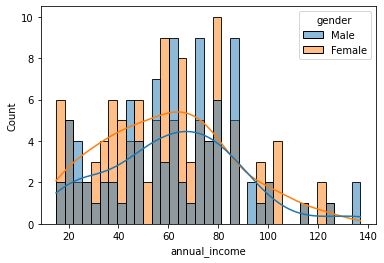

In [12]:
sns.histplot(df, x = 'annual_income', hue = 'gender',bins = 35, kde = True)

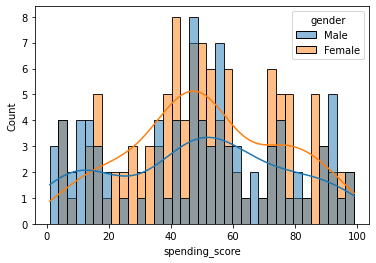

In [13]:
sns.histplot(df, x = 'spending_score', hue = 'gender',bins = 35, kde = True)

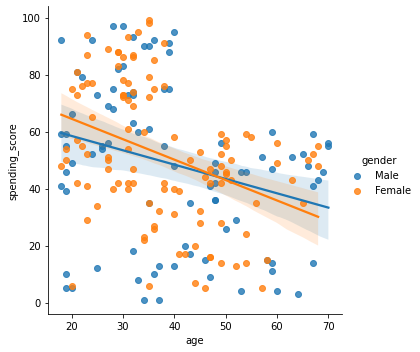

In [14]:
sns.lmplot(data = df, x = 'age', y = 'spending_score', hue = 'gender')

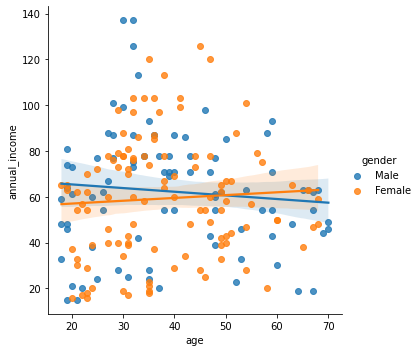

In [15]:
sns.lmplot(data = df, x = 'age', y = 'annual_income', hue = 'gender')

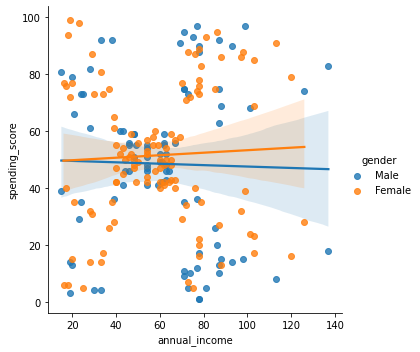

In [16]:
sns.lmplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'gender')

In [18]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df[['annual_income', 'spending_score']])

In [33]:
km = KMeans(n_clusters = 4, verbose = 0, random_state = 10)
km.fit(df_std)
df['flag'] = km.fit_predict(df_std)
df['flag'] = df['flag'].apply(lambda x : dict(zip(range(4), list('ABCD'))).get(x, 'none'))
df.head()

,customerid,gender,age,annual_income,spending_score,flag
0,1,Male,19,15,39,C
1,2,Male,21,15,81,B
2,3,Female,20,16,6,C
3,4,Female,23,16,77,B
4,5,Female,31,17,40,C


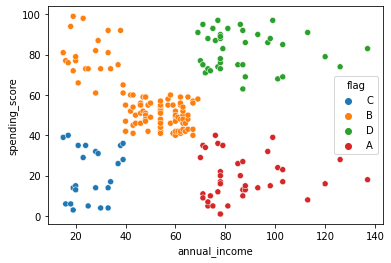

In [34]:
sns.scatterplot(data =  df, x = 'annual_income', y = 'spending_score', hue = 'flag')

In [36]:
cnt = df.groupby(['gender', 'flag'])['annual_income','spending_score'].agg(['mean', 'std'])
cnt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


annual_income            spending_score           
                     mean        std           mean        std
gender flag                                                   
Female A        89.055556  16.748915      23.722222  10.242963
       B        48.186441  14.941812      56.355932  14.873910
       C        27.357143   8.063280      21.714286  12.079408
       D        86.047619  14.157953      81.666667   7.831560
Male   A        85.150000  16.030481      14.050000   9.566801
       B        48.365854  14.182306      56.658537  13.325933
       C        24.666667   7.794229      19.666667  15.033296
       D        87.111111  18.929867      82.666667  11.103788

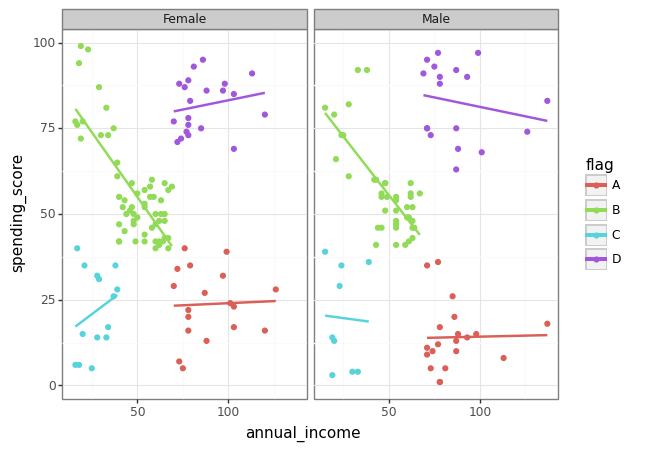

<ggplot: (8787729587609)>

In [38]:
(
    ggplot(df, aes('annual_income', 'spending_score', color = 'flag')) +
    gg.geom_point() +
    gg.geom_smooth(method = 'lm', se = False) + 
    gg.facet_wrap('~gender') +
    gg.theme_bw()
)

# Iterator

In [39]:
mat = [list('ABC'), list('DEF'), list('GHI')]
a = {letter : [r, c] for r, rows in enumerate(mat) for c, letter in enumerate(rows)}
arr = np.empty([3, 3], dtype = 'object')

for k, v in a.items() :
  arr[v[0], v[1]] = k

arr

array([['A', 'B', 'C'],
       ['D', 'E', 'F'],
       ['G', 'H', 'I']], dtype=object)

In [40]:
b  = pd.DataFrame({'name' : np.random.choice(['park', 'lee', 'kim'], 100, replace = True)})
b.head()


,name
0,lee
1,kim
2,park
3,lee
4,park


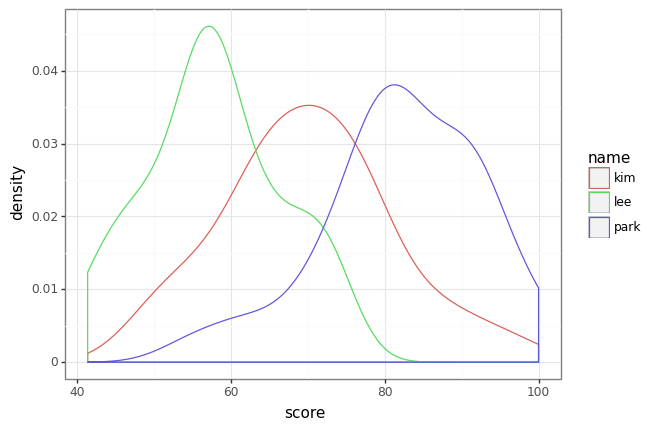

<ggplot: (8787726725005)>

In [83]:
# name
# park    38
# kim     32
# lee     30
# def get_score(name) :


# res = defaultdict(list)

def get_score(df) :
  
  temp_cnt = df.value_counts().reset_index()
  temp_cnt.columns = ['name', 'cnt']  

  pyo = []

  for i in range(len(temp_cnt)) :
    m = np.random.randint(low = 50, high = 90, size = 1)[0]
    s = np.random.randint(low = 3, high = 20, size = 1)[0]  

    temp_df = pd.DataFrame({'name' : np.repeat(temp_cnt['name'][i], temp_cnt['cnt'][i]),
                            'score' : np.random.normal(m, s, temp_cnt['cnt'][i])
                                                          })  
    temp_df['score'] = [a if a <= 100  else 100 for a in temp_df['score']]
    pyo.append(temp_df)

  return pd.concat(pyo)

temp_score = get_score(b)
temp_score.head()
(
    ggplot(temp_score, aes('score', color = 'name')) +
    gg.geom_density() +
    gg.theme_bw()
)